## Importing Libraries

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Data Preprocessing

### Training Image Preprocessing

In [2]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 70295 files belonging to 38 classes.


### Validation Image Preprocessing

In [3]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 17572 files belonging to 38 classes.


In [4]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [5]:
for x,y in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[122.5  124.5  137.5 ]
   [120.   122.   135.  ]
   [110.25 112.25 125.25]
   ...
   [146.   148.   161.  ]
   [150.5  152.5  165.5 ]
   [157.25 159.25 172.25]]

  [[114.75 116.75 129.75]
   [113.25 115.25 128.25]
   [111.5  113.5  126.5 ]
   ...
   [145.5  147.5  160.5 ]
   [137.5  139.5  152.5 ]
   [152.25 154.25 167.25]]

  [[112.5  114.5  127.5 ]
   [122.   124.   137.  ]
   [121.25 123.25 136.25]
   ...
   [161.   163.   176.  ]
   [152.75 154.75 167.75]
   [139.   141.   154.  ]]

  ...

  [[121.   122.   140.  ]
   [126.5  127.5  145.5 ]
   [120.   121.   139.  ]
   ...
   [166.25 167.25 185.25]
   [166.5  167.5  185.5 ]
   [171.75 172.75 190.75]]

  [[106.75 107.75 125.75]
   [128.25 129.25 147.25]
   [112.   113.   131.  ]
   ...
   [158.   159.   177.  ]
   [159.25 160.25 178.25]
   [159.25 160.25 178.25]]

  [[132.5  133.5  151.5 ]
   [133.   134.   152.  ]
   [117.25 118.25 136.25]
   ...
   [163.75 164.75 182.75]
   [166.   167.   185.  ]
   [152.25 153.25 17

## Building Model 

### Importing Important Libraries

In [63]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential

In [7]:
model = Sequential()

In [8]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

c:\Anaconda_Download\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [10]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [11]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [12]:
model.add(Dropout(0.25))

In [13]:
model.add(Flatten())

In [14]:
model.add(Dense(units=1500,activation='relu'))

In [15]:
model.add(Dropout(0.4))

In [16]:
model.add(Dense(units=38,activation='softmax'))

## Compiling Model

In [17]:
model.compile(optimizer= tf.keras.optimizers.Adam(learning_rate = 0.0001), loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [18]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 63, 63, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 6, 6, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │     1,729,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │        57,038 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,852,170 (7.07 MB)

 Trainable params: 1,852,170 (7.07 MB)

 Non-trainable params: 0 (0.00 B)

## Training Model

In [19]:
training_history = model.fit(x=training_set ,validation_data=validation_set, epochs=10)

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 328s 148ms/step - accuracy: 0.3811 - loss: 2.2358 - val_accuracy: 0.8014 - val_loss: 0.6623
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 266s 121ms/step - accuracy: 0.7647 - loss: 0.7707 - val_accuracy: 0.8663 - val_loss: 0.4393
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 263s 120ms/step - accuracy: 0.8347 - loss: 0.5251 - val_accuracy: 0.8995 - val_loss: 0.3245
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 259s 118ms/step - accuracy: 0.8732 - loss: 0.4030 - val_accuracy: 0.9157 - val_loss: 0.2657
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 260s 118ms/step - accuracy: 0.8954 - loss: 0.3200 - val_accuracy: 0.9125 - val_loss: 0.2732
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 260s 118ms/step - accuracy: 0.9141 - loss: 0.2675 - val_accuracy: 0.9266 - val_loss: 0.2241
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 261s 119ms/step - accuracy: 0.9204 - loss: 0.2374 - val_accuracy: 0.9419 - val_loss: 0.1800
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 261s 119ms/step - ac

## Model Evaluation

In [20]:
train_loss,train_acc = model.evaluate(training_set)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 136s 62ms/step - accuracy: 0.9829 - loss: 0.0581


In [21]:
print(train_loss,train_acc)

0.05456972494721413 0.9840387105941772


In [22]:
val_loss,val_acc = model.evaluate(validation_set)

550/550 ━━━━━━━━━━━━━━━━━━━━ 29s 53ms/step - accuracy: 0.9479 - loss: 0.1658


### Saving Model

In [23]:
model.save("trained_model.h5")

In [24]:
model.save("trained_model.keras")

In [25]:
training_history.history

{'accuracy': [0.5526424646377563,
  0.7855039238929749,
  0.844512403011322,
  0.8797211647033691,
  0.8989970684051514,
  0.9159968495368958,
  0.9256419539451599,
  0.9357849359512329,
  0.9428977966308594,
  0.9483462572097778],
 'loss': [1.5361193418502808,
  0.6973585486412048,
  0.4947581887245178,
  0.37915629148483276,
  0.3078565001487732,
  0.2603781521320343,
  0.22224654257297516,
  0.19414126873016357,
  0.17089277505874634,
  0.15254980325698853],
 'val_accuracy': [0.801445484161377,
  0.8662645220756531,
  0.8994991779327393,
  0.9157181978225708,
  0.9124743938446045,
  0.9265877604484558,
  0.9418962001800537,
  0.947416365146637,
  0.9510015845298767,
  0.9503186941146851],
 'val_loss': [0.6622790098190308,
  0.43929749727249146,
  0.3244684338569641,
  0.26567867398262024,
  0.2731855511665344,
  0.22406286001205444,
  0.17995914816856384,
  0.1627848893404007,
  0.1517409235239029,
  0.15777884423732758]}

In [26]:
#Recording History in json
import json
with open("training_hist.json","w") as f:
    json.dump(training_history.history,f)

### Accuracy Visualization

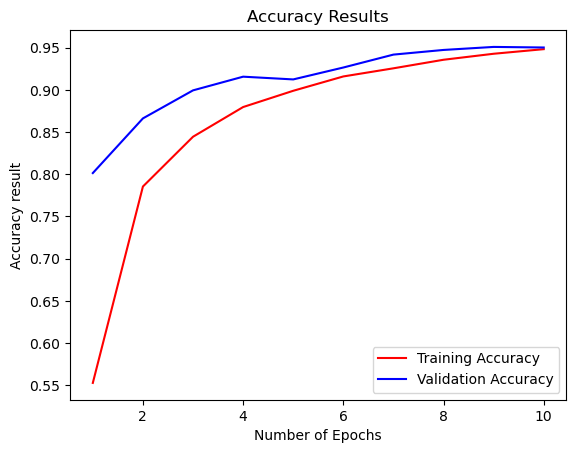

In [31]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history["accuracy"],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history["val_accuracy"],color='blue',label='Validation Accuracy')
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy result")
plt.title("Accuracy Results")
plt.legend()
plt.show()

## Some Other Metrics

In [33]:
class_name = validation_set.class_names
print(class_name)

['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Sp

In [34]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 17572 files belonging to 38 classes.


In [35]:
y_pred = model.predict(test_set)
print(y_pred)

550/550 ━━━━━━━━━━━━━━━━━━━━ 38s 69ms/step
[[9.99898314e-01 6.90698357e-07 8.53085991e-10 ... 9.22913655e-12
  9.66386433e-12 1.17575405e-09]
 [9.99997497e-01 2.98507473e-07 3.50338447e-09 ... 1.53838829e-13
  2.11417342e-12 2.32319697e-12]
 [9.99984622e-01 2.63205675e-06 2.34486937e-08 ... 1.43903769e-13
  6.23785572e-12 3.43212680e-09]
 ...
 [1.99096006e-09 1.13666726e-13 9.25598620e-09 ... 9.04737136e-12
  2.74016781e-10 9.99994278e-01]
 [8.75983091e-08 4.60213881e-11 6.05389294e-09 ... 1.22414634e-10
  1.95429686e-10 9.99987841e-01]
 [7.38794776e-17 2.47327710e-22 2.30461307e-19 ... 9.96896829e-21
  2.06841380e-14 9.99999523e-01]]


In [37]:
print(y_pred.shape)

(17572, 38)


In [38]:
predicted_categories = tf.argmax(y_pred, axis=1)

In [39]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [46]:
true_categories = tf.concat([y for x,y in test_set], axis=0)
print(true_categories)

tf.Tensor([ 0  0  0 ... 37 37 37], shape=(17572,), dtype=int32)


In [47]:
Y_true = tf.argmax(true_categories)
print(Y_true)

tf.Tensor(17091, shape=(), dtype=int64)


In [52]:
from sklearn.metrics import classification_report,confusion_matrix

In [51]:
print(classification_report(true_categories,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.95      0.91      0.93       504
                                 Apple___Black_rot       0.98      0.98      0.98       497
                          Apple___Cedar_apple_rust       0.98      0.94      0.96       440
                                   Apple___healthy       0.92      0.96      0.94       502
                               Blueberry___healthy       0.90      0.99      0.95       454
          Cherry_(including_sour)___Powdery_mildew       0.94      0.98      0.96       421
                 Cherry_(including_sour)___healthy       0.96      0.99      0.98       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.96      0.84      0.90       410
                       Corn_(maize)___Common_rust_       0.97      0.99      0.98       477
               Corn_(maize)___Northern_Leaf_Blight       0.91      0.98      0.

In [55]:
cn = confusion_matrix(true_categories,predicted_categories)

### Confusion Matrix Visualization

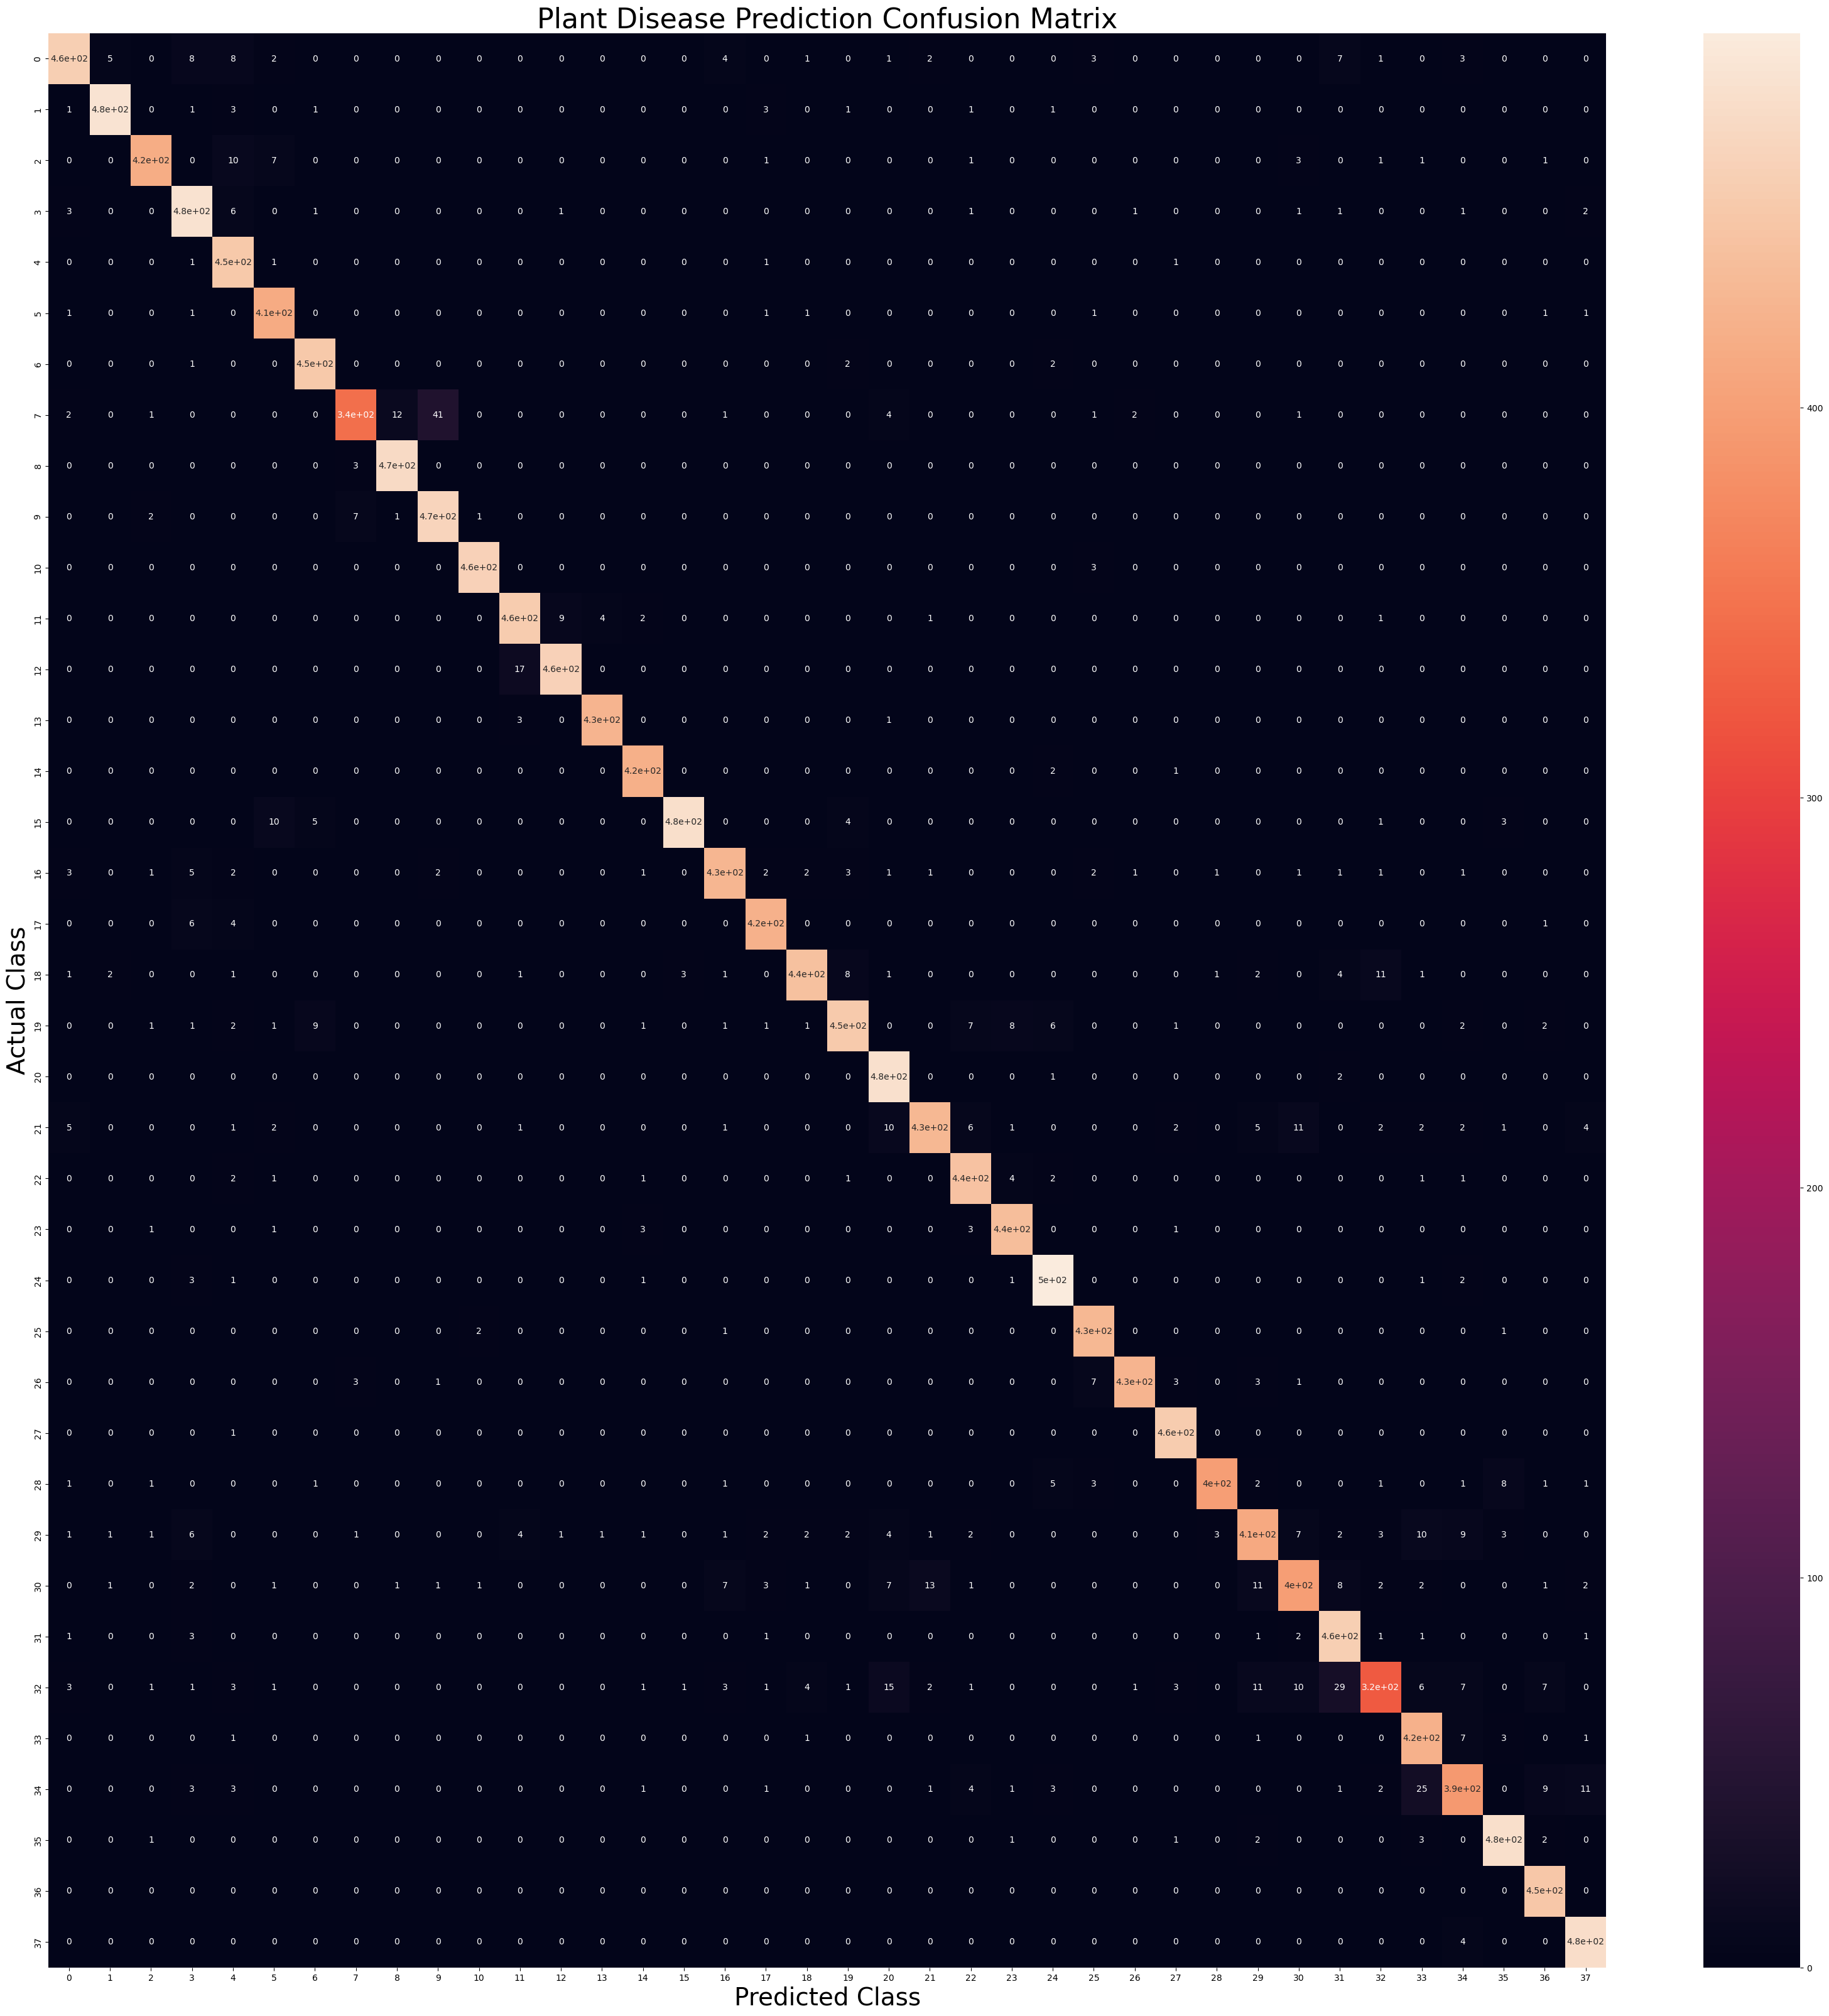

In [62]:
plt.figure(figsize=(40,40))
sns.heatmap(cn,annot= True)
plt.xlabel('Predicted Class',fontsize=28)
plt.ylabel('Actual Class',fontsize=28)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize=32)
plt.show()